In [1]:
import chipwhisperer as cw
import matplotlib.pylab as plt

In [3]:
n = 0
scope = cw.scope()
scope.default_setup()
scope.adc.samples = 24400
scope.adc.offset = 24400 * n
scope.clock.adc_src = 'clkgen_x1'

In [5]:
cw.program_target(scope, cw.programmers.XMEGAProgrammer, "../../hardware/victims/firmware/simpleserial-rsa/simpleserial-rsa-CW303.hex")

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 13897 bytes


In [6]:
target = cw.target(scope)

In [7]:
text = [0 for i in range(16)]
text[14] = 0x81
text[15] = 0x40
text = bytearray(text)
print(text)

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x81@')


In [13]:
scope.arm()
target.simpleserial_write('p', text)
ret = scope.capture()
wave = scope.get_last_trace()
print(wave)

[0.10058594 0.10644531 0.11425781 ... 0.09082031 0.14160156 0.14941406]


<IPython.core.display.Javascript object>


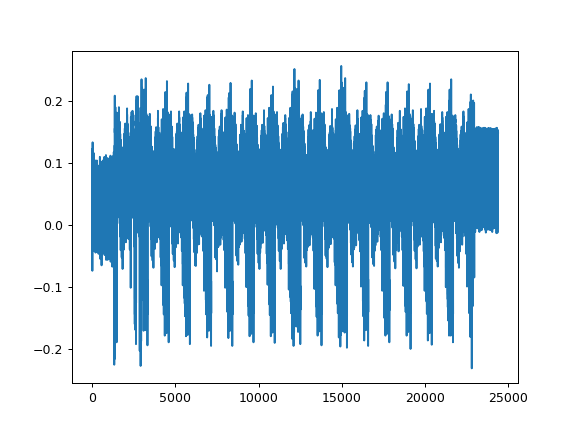

In [14]:
%matplotlib notebook
plt.figure(0)
plt.plot(wave)

In [10]:
import numpy as np
np.save('wave' + str(n) + '.npy', wave)

In [15]:
scope.dis()
target.dis()